### Visualizing Dengue Trends

This project aims to visualize trends on Dengue cases happening in the Philippines. Dengue fever or also known as Dengue in the Philippines is a mosquito-borne tropical virus brought by the Dengue Virus. This has been a global problem particularly in tropical countries such as the Philippines as cases soar up to millions.

The following concepts are used for the accomplishment of this project:
- Dataframe Manipulation
- Mapping Functions
- Data Visualization

### Loading the Packages

The following packages are loaded for this project:
- Readr: for reading the dataset
- Dplyr: for loading dataset functions
- Ggplot2: for visualizing the data
- Purrr: for loading mapping functions
- Stringr: for manipulating strings

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(purrr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Loading the Dataset

The dataset is then loaded using the read_csv function. Initial inspection shows that the dataset contains around 1020 monthly records of cases/deaths per region and 5 variables.  For more info about this dataset, you can visit the source here: [https://www.kaggle.com/datasets/vincentgupo/dengue-cases-in-the-philippines](http://)

In [2]:
dengue_cases <- read_csv("../input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv", 
                         show_col_types = FALSE)
print(paste0("This dataset has ", nrow(dengue_cases), " rows and ", ncol(dengue_cases), " columns."))
head(dengue_cases, 10)

[1] "This dataset has 1020 rows and 5 columns."


Month,Year,Region,Dengue_Cases,Dengue_Deaths
<chr>,<dbl>,<chr>,<dbl>,<dbl>
January,2016,Region I,705,1
February,2016,Region I,374,0
March,2016,Region I,276,0
April,2016,Region I,240,2
May,2016,Region I,243,1
June,2016,Region I,345,1
July,2016,Region I,1295,2
August,2016,Region I,1598,3
September,2016,Region I,1415,3


### Classifying each Region into Islands

To further improve the granularity of this project, we'll further classify each region to its respective islands, namely: Luzon, Visayas, and Mindanao.

In [3]:
luzon_regions <- c('Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'CAR', 'NCR')
visayas_regions <- c('Region VI', 'Region VII', 'Region VIII')
mindanao_regions <- c('Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII', 'BARMM')

### Creating Additional Columns

We'll the following columns for our analysis/visualization:
- month_num: for converting month names to months
- month_abb: for converting month names to abbreviations
- year_month: for associating each month with its corresponding year
- island: for adding granularity for the analysis

In [4]:
dengue_cases <- dengue_cases %>% mutate(month_num = unlist(map(Month, function(month) which(month == month.name))),
                                        month_abb = unlist(map(Month, function(month) month.abb[which(month == month.name)])),
                                        year_month = paste(Year, month_num, sep="-"),
                                        island = case_when(Region %in% luzon_regions ~ "Luzon",
                                                          Region %in% visayas_regions ~ "Visayas",
                                                          TRUE ~ "Mindanao"))

dengue_cases$month_abb = factor(dengue_cases$month_abb, levels = unique(dengue_cases$month_abb))
dengue_cases$Year = factor(dengue_cases$Year, levels = unique(dengue_cases$Year))
dengue_cases$year_month = unlist(map(dengue_cases$year_month, function(year_mon) paste(unlist(str_split(year_mon, ""))[-c(1:2)], collapse = "")))        
dengue_cases$year_month = factor(dengue_cases$year_month, levels = unique(dengue_cases$year_month))                                                        
head(dengue_cases, 10)

Month,Year,Region,Dengue_Cases,Dengue_Deaths,month_num,month_abb,year_month,island
<chr>,<fct>,<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
January,2016,Region I,705,1,1,Jan,16-1,Luzon
February,2016,Region I,374,0,2,Feb,16-2,Luzon
March,2016,Region I,276,0,3,Mar,16-3,Luzon
April,2016,Region I,240,2,4,Apr,16-4,Luzon
May,2016,Region I,243,1,5,May,16-5,Luzon
June,2016,Region I,345,1,6,Jun,16-6,Luzon
July,2016,Region I,1295,2,7,Jul,16-7,Luzon
August,2016,Region I,1598,3,8,Aug,16-8,Luzon
September,2016,Region I,1415,3,9,Sep,16-9,Luzon


### What is the Current Trend of Dengue Cases in the Philippines?

As observed below, the overall trend of cases appeared to be decreasing as the years have followed. Despite the huge spike in cases that happened in 2019, it has significantly subsided in 2020, given that majority of the people are social distancing due to the COVID-19 pandemic and have less contact outdoors.

`summarise()` has grouped output by 'year_month'. You can override using the
`.groups` argument.


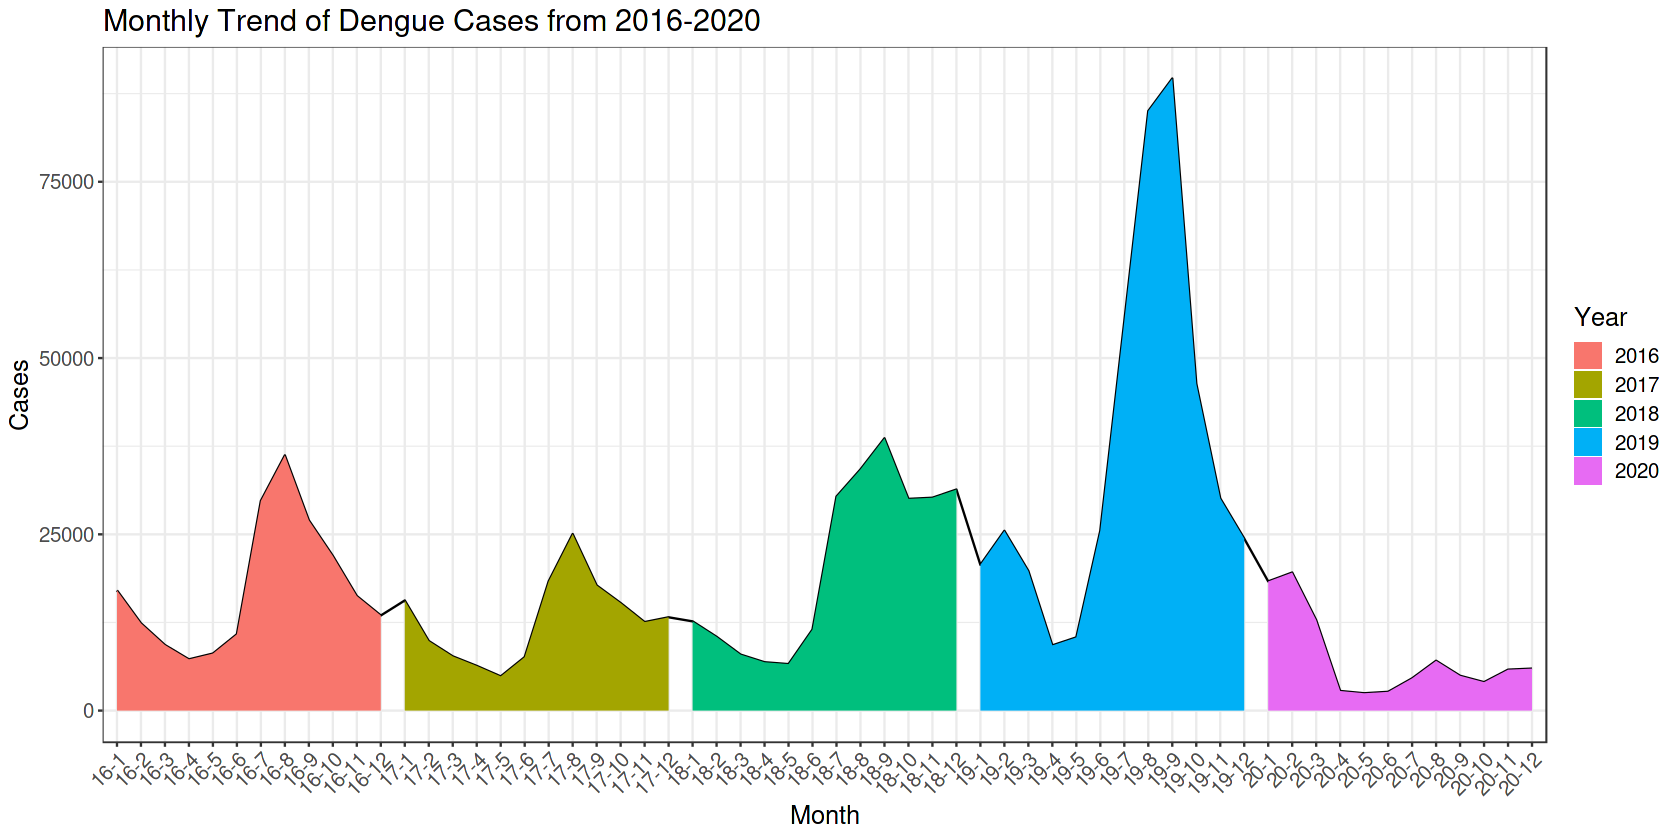

In [5]:
options(repr.plot.width=14, repr.plot.height=7)

monthly_trend <- dengue_cases %>% 
group_by(year_month, Year) %>% 
summarize(Cases = sum(Dengue_Cases), 
         Deaths = sum(Dengue_Deaths),
         death_case_ratio = Deaths/Cases)

monthly_trend %>% ggplot(aes(x = year_month, y = Cases, group = 1)) + 
geom_line() + geom_area(data = monthly_trend %>% filter(Year == 2016), 
                       aes(x = year_month, y = Cases, fill = "2016")) +
geom_area(data = monthly_trend %>% filter(Year == 2017), 
                       aes(x = year_month, y = Cases, fill = "2017")) + 
geom_area(data = monthly_trend %>% filter(Year == 2018), 
                       aes(x = year_month, y = Cases, fill = "2018")) + 
geom_area(data = monthly_trend %>% filter(Year == 2019), 
                       aes(x = year_month, y = Cases, fill = "2019")) + 
geom_area(data = monthly_trend %>% filter(Year == 2020), 
                       aes(x = year_month, y = Cases, fill = "2020")) +
labs(title = "Monthly Trend of Dengue Cases from 2016-2020", x = "Month") +
theme_bw() + theme(text = element_text(size = 15), 
                   axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + scale_fill_discrete(name = "Year")

### Which Month/s have the Highest Number of Dengue Cases?

Looking further in the seasonality of this disease, we can see that most of the cases started to peak from June until August, where most of the cases are at the highest. This also coincides with the fact that those months are the rainy months, thus, mosquitos are more likely to appear/reproduce due to the increased presence of rainwater.

`summarise()` has grouped output by 'month_abb'. You can override using the
`.groups` argument.


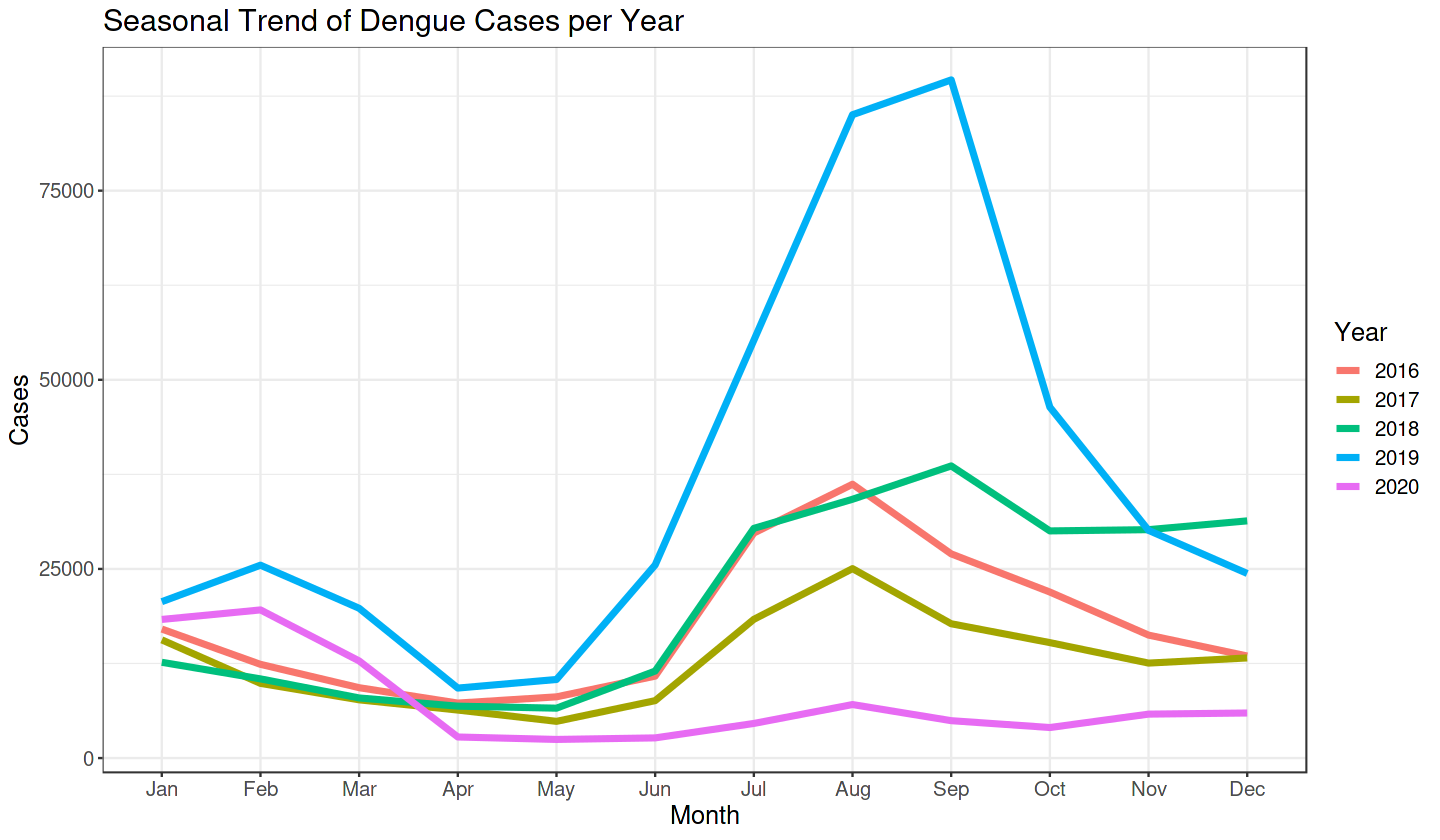

In [6]:
options(repr.plot.width=12, repr.plot.height=7)

seasonal_trend <- dengue_cases %>% 
group_by(month_abb, Year) %>% 
summarize(Cases = sum(Dengue_Cases))

seasonal_trend %>% ggplot(aes(x = month_abb, y = Cases, group = Year, color = Year)) + 
geom_line(size=1.5) + labs(title = "Seasonal Trend of Dengue Cases per Year", x = "Month") + 
theme_bw() + theme(text = element_text(size = 15))

### Which Regions have the Highest Average Number of Dengue Cases?

Breaking down by region, we can see that the highest average number of cases are coming from the CALABARZON region (Region IV-A) and the Central Luzon region (Region III). Population in these region is known to be high and certain areas are found to be rural or semi-urban.

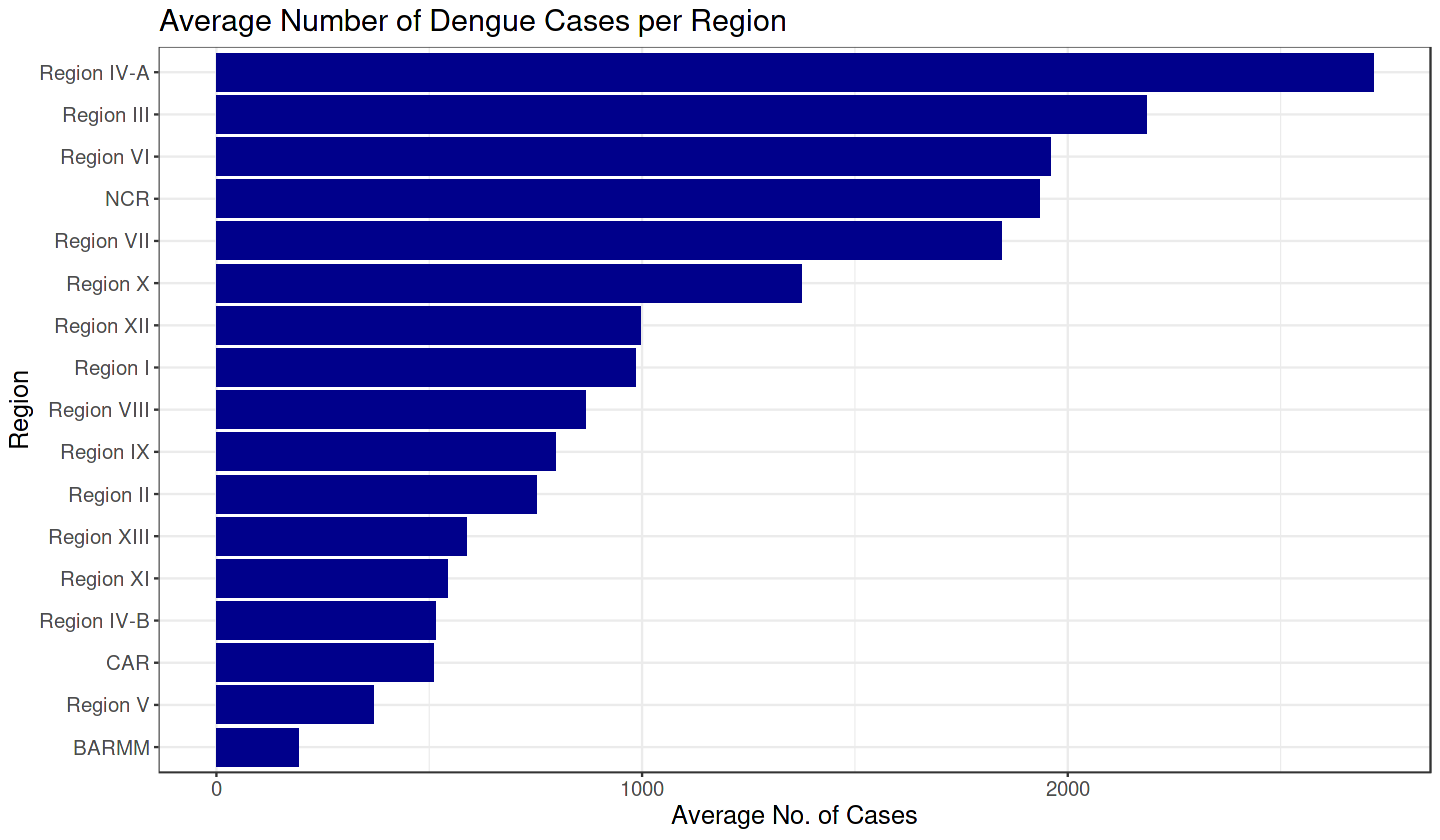

In [7]:
options(repr.plot.width=12, repr.plot.height=7)

average_cases <- dengue_cases %>% group_by(Region) %>% summarize(Avg_cases = mean(Dengue_Cases, na.rm=TRUE)) %>%
arrange(-Avg_cases)

average_cases %>% ggplot(aes(y = reorder(Region, Avg_cases), x = Avg_cases)) + geom_col(fill = "darkblue") + 
labs(title = "Average Number of Dengue Cases per Region", x = "Average No. of Cases", y = "Region") + 
theme_bw() + theme(text = element_text(size = 15))

### What is the Current Trend of Death-to-Case Ratio in the Philippines?

Looking at the current trends, we can see that there is no evidence of either an increase or decrease in the number of deaths per cases. We can see, however, that the case-to-death ratio tends to increase significantly in the last months of the year (Sept., Oct., Nov.,) for 2016, 2017, and 2020. This could also imply how hospitals are unable to accommodate further patients and providing the necessary healthcare, thus, leading to the unwanted demise of patients.

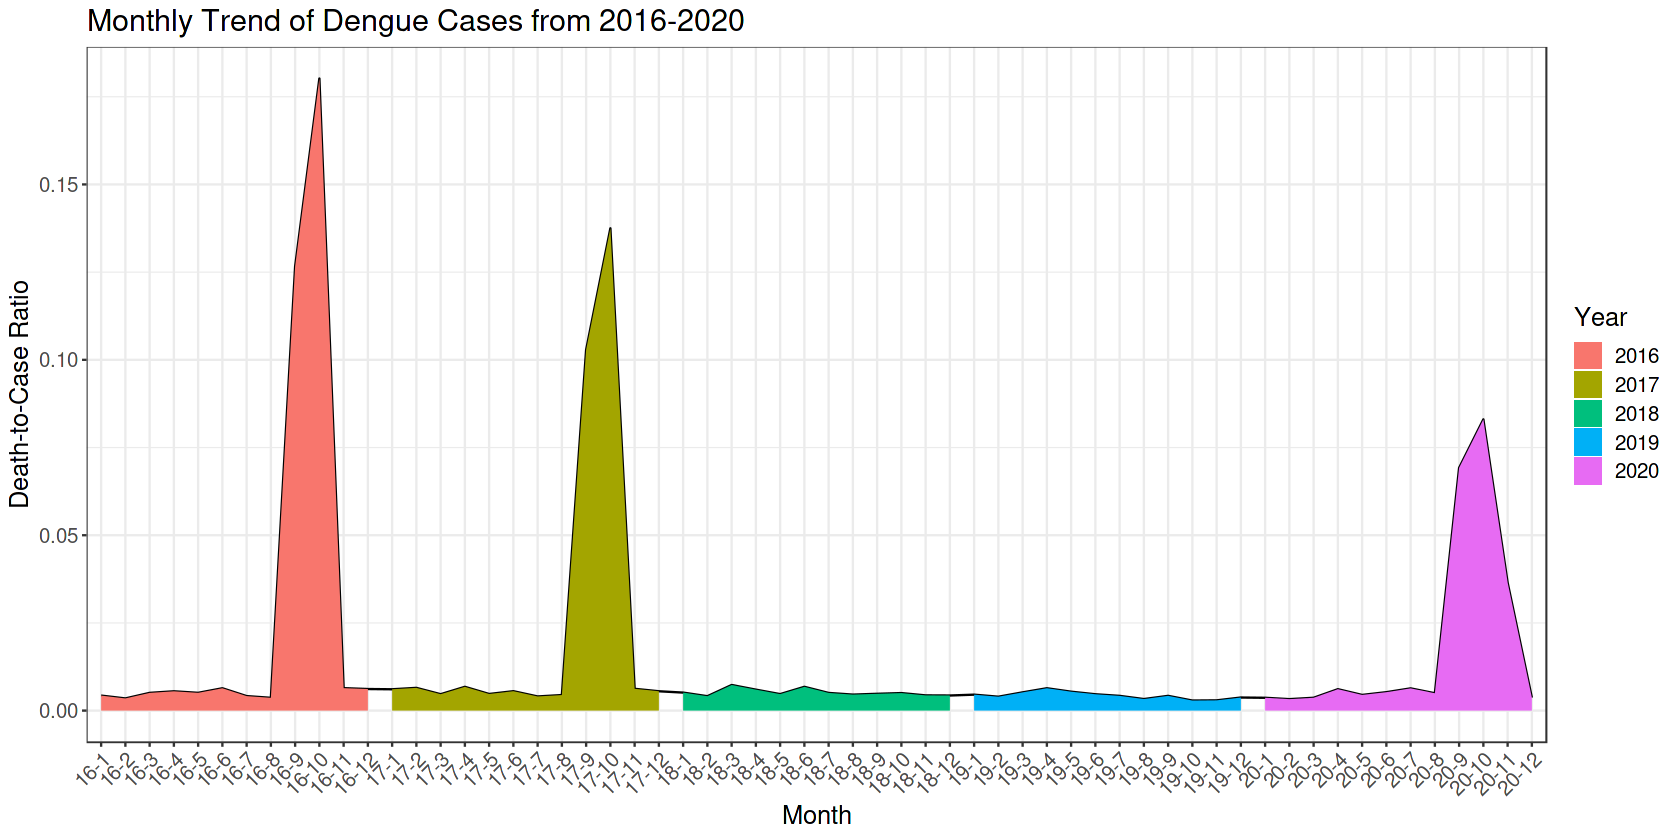

In [8]:
options(repr.plot.width=14, repr.plot.height=7)

monthly_trend %>% ggplot(aes(x = year_month, y = death_case_ratio, group = 1)) + 
geom_line() + geom_area(data = monthly_trend %>% filter(Year == 2016), 
                       aes(x = year_month, y = death_case_ratio, fill = "2016")) +
geom_area(data = monthly_trend %>% filter(Year == 2017), 
                       aes(x = year_month, y = death_case_ratio, fill = "2017")) + 
geom_area(data = monthly_trend %>% filter(Year == 2018), 
                       aes(x = year_month, y = death_case_ratio, fill = "2018")) + 
geom_area(data = monthly_trend %>% filter(Year == 2019), 
                       aes(x = year_month, y = death_case_ratio, fill = "2019")) + 
geom_area(data = monthly_trend %>% filter(Year == 2020), 
                       aes(x = year_month, y = death_case_ratio, fill = "2020")) +
labs(title = "Monthly Trend of Dengue Cases from 2016-2020", x = "Month", y = "Death-to-Case Ratio") +
theme_bw() + theme(text = element_text(size = 15), 
                   axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + scale_fill_discrete(name = "Year")

### Which Island has the Highest Death-to-Case Ratio in the Philippines?

Looking into the case-to-death ratio per island, we can see that Mindanao had the highest overall death-to-case ratio in the country. In other words, for every 100 cases of Dengue in Mindanao, 2 eventually die of the disease. This could be attributed to the disparity of the healthcare system in the regions, as well as the poverty prevalance in these areas.

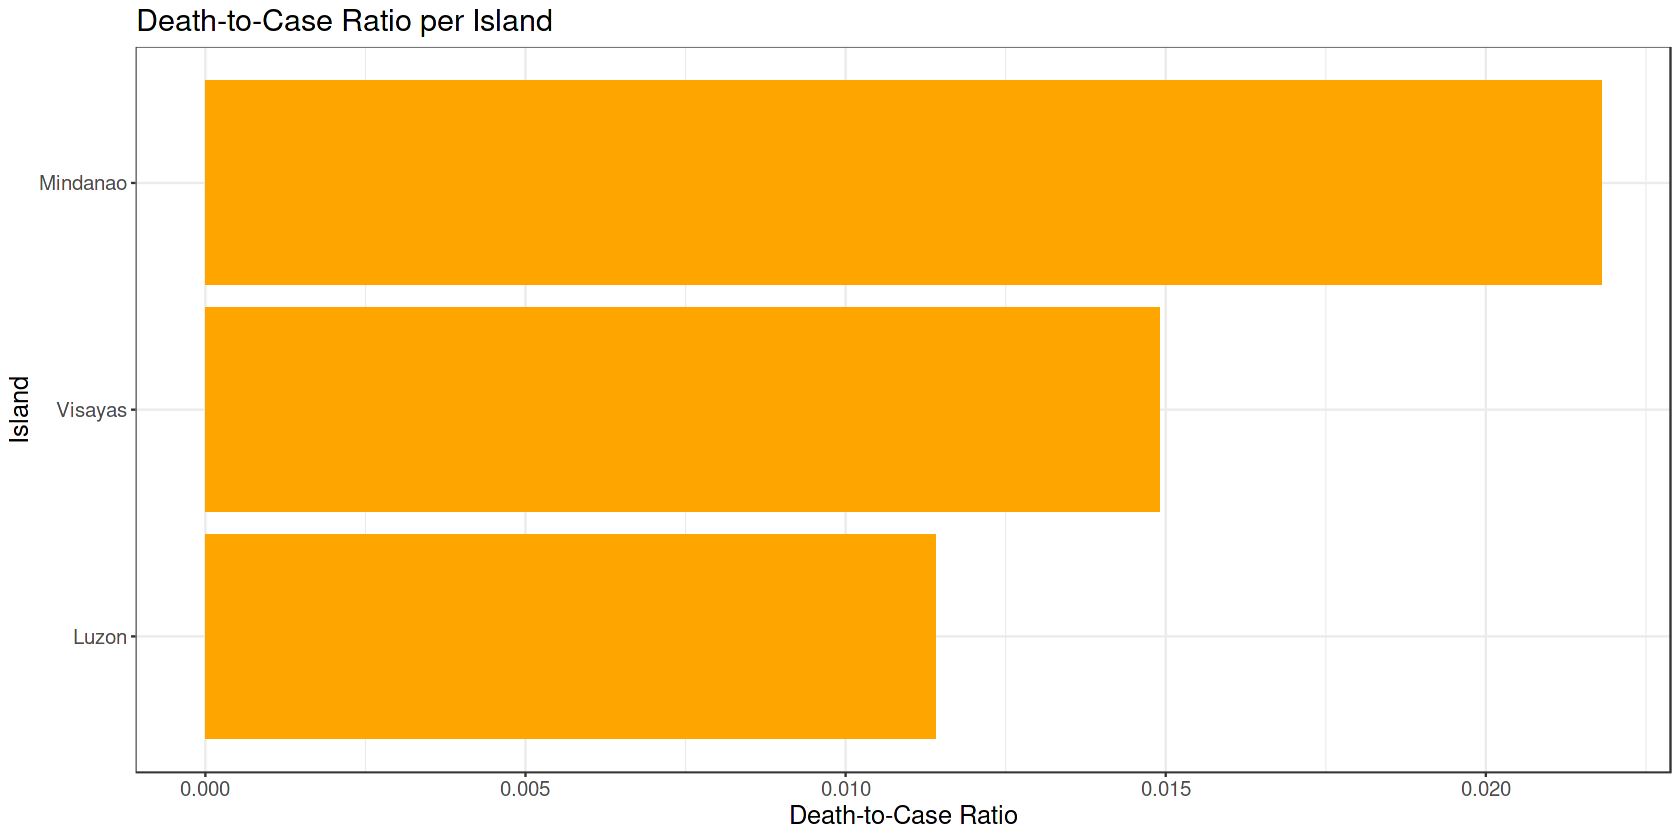

In [9]:
dtc_island <- dengue_cases %>% group_by(island) %>% 
summarize(death_case_ratio = round(sum(Dengue_Deaths)/sum(Dengue_Cases), 4)) %>%
arrange(-death_case_ratio)

dtc_island %>% ggplot(aes(y = reorder(island, death_case_ratio), x = death_case_ratio)) + geom_col(fill = "orange") + 
labs(title = "Death-to-Case Ratio per Island", x = "Death-to-Case Ratio", y = "Island") + 
theme_bw() + theme(text = element_text(size = 15))

### Which Region has the Highest Death-to-Case Ratio in the Philippines?

Lastly, it is found that the region with the highest number of deaths per case is found in SOCCSKSARGEN region (Region XII) which is found in Central Mindanao. One reason for this is that the region is mainly known for its river system, being dubbed as the drainage basin of Mindanao. It is likely that these serve as breeding sites for mosquitos and with the challenges in healthcare as well as people in rural areas, mortality rate is likely to be higher compared to other regions in the Philippines

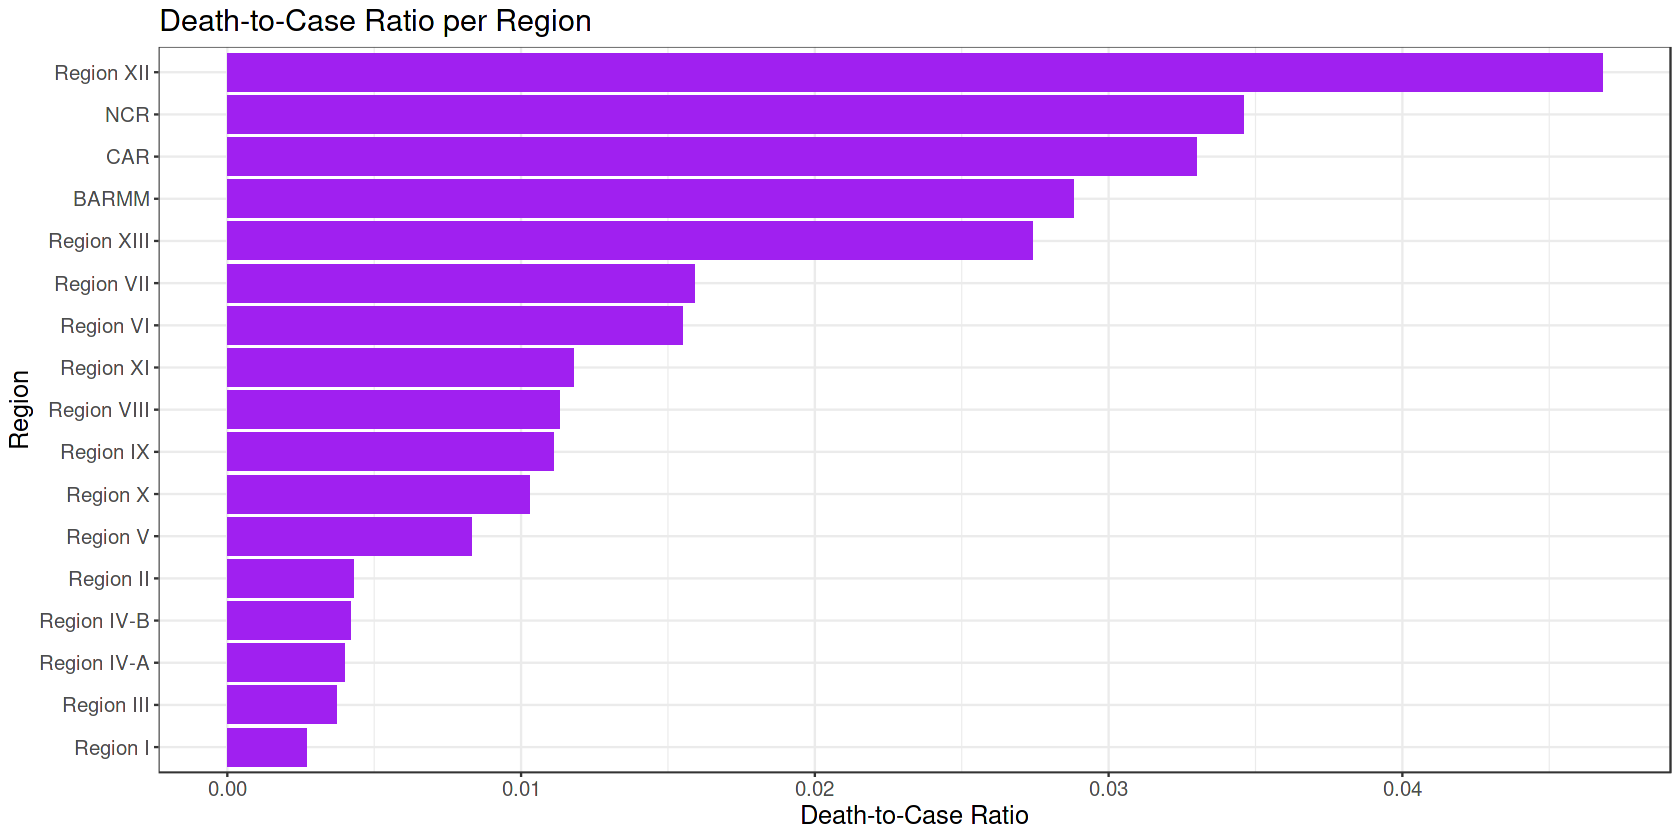

In [10]:
dtc_region <- dengue_cases %>% group_by(Region) %>% 
summarize(death_case_ratio = round(sum(Dengue_Deaths)/sum(Dengue_Cases), 4)) %>%
arrange(-death_case_ratio)

dtc_region %>% ggplot(aes(y = reorder(Region, death_case_ratio), x = death_case_ratio)) + geom_col(fill = "purple") + 
labs(title = "Death-to-Case Ratio per Region", x = "Death-to-Case Ratio", y = "Region") + 
theme_bw() + theme(text = element_text(size = 15))